# <div style="color:#ADEFD1FF;background-color:#00203FFF;padding:2%;border-radius:15px 15px;font-size:1em;text-align:center">DSI206 Plant Seedlings classification </div>
<div style="color:#00203FFF;
           font-size:110%;
           ">โจทย์ก็คือเราจะต้องทำการจำแนกและระบุพันธุ์ของเมล็ดพืชในแต่ละรูปที่ได้รับมา <br>
โดยสมาชิกของพวกเรามี ดังนี้ <br>
1. นางสาวสิรินธร ผาไชย 6424650023 <br>
2. นางสาวปริตา ต้นวงษ์ 6424650122 <br>
3. นางสาวณัชชา ศรีลาชัย 6424650288 <br>
4. นางสาวนันท์นภัส วงศ์สิริเจริญ 6424650544 <br>
5. นางสาววิชญา เยี่ยมเพื่อน 6424650619 </div>


<div style="color:#00203FFF;
           font-size:110%;
           ">
    <b>Data Description</b>
    <br>ใน dataset ของเราจะมีพันธุ์พืชทั้งหมด 12 สายพันธุ์ (Species) <br>
1. Black-grass <br>
2. Charlock <br>
3. Cleavers <br>
4. Common Chickweed <br>
5. Common wheat <br>
6. Fat Hen <br>
7. Loose Silky-bent <br>
8. Maize <br>
9. Scentless Mayweed <br>
10. Shepherds Purse <br>
11. Small-flowered Cranesbill <br>
12. Sugar beet <br>
    <b>Objectives</b> <br>
1. สร้างโมเดลที่สามารถระบุสายพันธุ์ของพืชที่อยู่ในรูปได้
</div>

# <div style= "color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Table of Contents📰</p></div>
    
* [Loading Libraries📚](#intLink)
* [Reading Data Files📂](#files)
* [Data Exploration🔎](#explore)
* [Data Preparation📦](#pre)
* [Data Modeling📈](#model)
* [Model Evaluation🧪](#evaluate)

# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="intLink"><b> </b> Loading Libraries📚</p></div>

Import libraries ทั่วไป

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle as p
import plotly
import random
from prettytable import PrettyTable
import shutil
import cv2
import PIL
from glob import glob
import plotly.graph_objs as go
from math import sqrt, floor

Pipeline Specifics

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras import models, layers, callbacks
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="files"><b> </b> Reading Data Files📂</p></div>

In [3]:
import pathlib
dataset="../input/plant-seedlings-classification/train" 
data_dir = pathlib.Path(dataset)   

# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="explore"><b> </b> Data Exploration🔎</p></div>

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print("จำนวนรูปทั้งหมด : ",image_count)

จำนวนรูปทั้งหมด :  4750


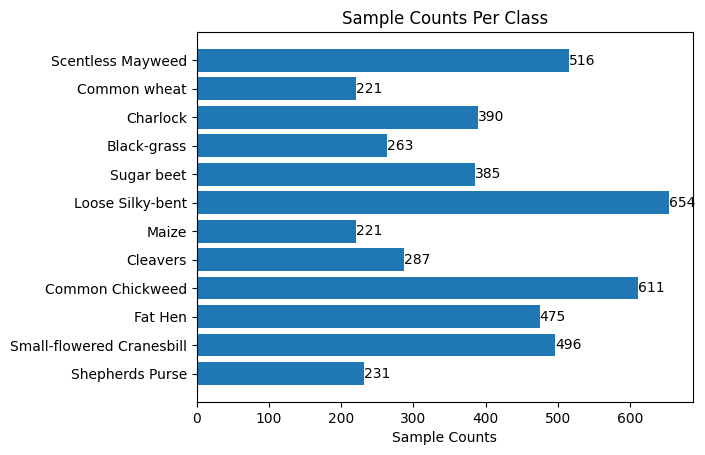

In [5]:
classes= []
sample_counts= []

for f in os.listdir('../input/plant-seedlings-classification/train'):
    train_class_path= os.path.join('../input/plant-seedlings-classification/train', f)
    if os.path.isdir(train_class_path):
        classes.append(f)
        sample_counts.append(len(os.listdir(train_class_path)))

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(classes) )
hbar = ax.barh(y_pos, sample_counts, align='center')
#ทำเป็นแนวตั้งแล้วตัวหนังสือซ้อนกัน อ่านchartยาก
ax.bar_label(hbar)
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)

ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel ("Sample Counts")
ax.set_title ("Sample Counts Per Class")
plt.show()

ดูจำนวนตัวอย่างของแต่ละสายพันธุ์ที่ dataset ให้เรามาในชุดข้อมูล train ทั้งหมด 4750 รูป ซึ่งปรากฏว่า <br>
1. Black-grass มี 263 รูป<br>
2. Charlock มี 390 รูป<br>
3. Cleavers มี 287 รูป<br>
4. Common Chickweed มี 611 รูป<br>
5. Common wheat มี 221 รูป<br>
6. Fat Hen มี 475 รูป<br>
7. Loose Silky-bent มี 654 รูป<br>
8. Maize มี 221 รูป<br>
9. Scentless Mayweed มี 516 รูป<br>
10. Shepherds Purse มี 231 รูป<br>
11. Small-flowered Cranesbill มี 496 รูป<br>
12. Sugar beet มี 385 รูป<br>

# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="pre"><b> </b> Data Preparation📦</p></div>

**ระบุ parameter สำหรับการเทรน**

เราจะมีการระบุรอบของการเทรน (nb_epoch), จำนวนรูปใน 1 กลุ่ม (batch_size), ความก้างและความยาวของรูปในหน่วยพิกเซล (wigth, height) และการกำหนดชื่อให้แต่ละสปีชีส์ (species_list) สำหรับไฟล์ submission

In [6]:
nb_epoch     = 40
batch_size   = 19
width        = 300
height       = 300
# s = define_generators()
# species = s(species)
# print(species)
species_list = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen",
                "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill",
                "Sugar beet"]

**define the neural network**

ส่วนของฟังก์ชั่นในการกำหนดว่าโมเดลของเราจะใช้อะไรในการเรียนร้ ภายในโมเดลจะทำอะไรกับข้อมูลบ้าง ซคางในที่นี้เราได้ทำการใช้ build-in module สำหรับ <b> Inception-ResNet V2 ใน tf.keras</b>

In [7]:
def define_model(width, height):
    model_input = tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
# Preprocesses a tensor or Numpy array encoding a batch of images.
    model_main = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(model_input)
    model_dense1 = tf.keras.layers.Flatten()(model_main)
    model_dense2 = tf.keras.layers.Dense(128, activation='relu')(model_dense1)
    model_out = tf.keras.layers.Dense(12, activation="softmax")(model_dense2)

    model = tf.keras.models.Model(model_input,  model_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

เราได้ทำการสร้างฟังก์ชั่น define_generators ขึ้นมาเพื่อเตรียมข้อมูลรูปภาพสำหรับการเรียนรู้โมเดล

In [8]:
def define_generators():
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=360,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.5,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2, # change to use validation instead of training on entire training set
    )

    train_generator = train_datagen.flow_from_directory(
        directory='/kaggle/input/plant-seedlings-classification/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='training',
    )

    validation_generator = train_datagen.flow_from_directory(
        directory='/kaggle/input/plant-seedlings-classification/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='validation',
    )

    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

    test_generator = test_datagen.flow_from_directory(
        directory='/kaggle/input/plant-seedlings-classification/',
        classes=['test'],
        target_size=(width, height),
        batch_size=1,
        color_mode='rgb',
        shuffle=False,
        class_mode='categorical')
#     species = train_generator.class_names
    return train_generator, validation_generator, test_generator

สิ่งที่เราทำคือใน <br>
**train_datagen** เราได้มีการหมุนรูปภาพแบบสุ่ม เลื่อนรูปภาพในแนวนอน-แนวต้ง บิดรูปภาพ ย่อ-ขยายรูปภาพ และพลิกรูปภาพในแนวนอนแนวตั้งแบบสุ่มซึ่งทั้งหมดนี้เราทำเพื่อเพิ่มความหลากหลายของรูปแบบรูปภาพที่โมเดลอาจจะพบเจอ และนอกจากนี้ใน train_datagen เราได้กำหนดข้อมูลไว้สำหรับ validation ไว้อีก 20% <br>
**train_generator และ validation_generator** เราสร้างขึ้นมาเพื่อใช้ในการดึงรูปภาพจากโฟลเดอร์ ในตัวแปรจะมีการปรับขนาดรูปภาพ แบ่งชุดข้อมูลและกำหนดลักษณะของข้อมูล เช่น การกำหนดรูปแบบของสีเป็น RGB <br>
และตัวแปรสุดท้าย **test_generator** เช่นกันเราใช้ในการดึงรูปภาพจากโฟลเดอร์สำหรับชุดข้อมูลทดสอบ
และมีการกำหนดลักษณะข้อมูลเช่นการปรับขนาดรูปภาพ ระบุรูปแบบสี และกำหนดให้ประมวลผลรูปภาพทีละรูป (batch_size=1)
ไม่สลับลำดับรูปภาพ (shuffle=False) และกำหนดให้มีข้อมูลประเภทของพืช (คลาส)

**Define the checkpoint**

เรามีการกำหนด callbacks สำหรบโมเดลเพื่อติดตามประสิทธิภาพการทำงานของโมเดล

In [9]:
def define_callbacks():
    save_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_acc',
        save_best_only=True,
        verbose=1
    )

    return save_callback

# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="model"><b> </b> Data Modeling📈</p></div>

**define the model and fit**

In [10]:
model = define_model(width, height)
model.summary()
train_generator, validation_generator, test_generator = define_generators()
save_callback = define_callbacks()

219055592/219055592 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 flatten (Flatten)           (None, 98304)             0         
                                                                 
 dense (Dense)               (None, 128)               12583040  
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 66921324 (255.28 MB)
Trainable params: 6686078

In [11]:
his = model.fit(
    train_generator,
    epochs=nb_epoch,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data= validation_generator,
    validation_steps=validation_generator.samples // batch_size,
#    callbacks=[save_callback] UNCOMMENT THIS LINE TO SAVE BEST VAL_ACC MODEL
)

Epoch 1/40
200/200 [==============================] - 310s 1s/step - loss: 1.5956 - accuracy: 0.4588 - val_loss: 0.7898 - val_accuracy: 0.7240
Epoch 2/40
200/200 [==============================] - 169s 843ms/step - loss: 0.5420 - accuracy: 0.8147 - val_loss: 0.4511 - val_accuracy: 0.8636
Epoch 3/40
200/200 [==============================] - 168s 841ms/step - loss: 0.3792 - accuracy: 0.8655 - val_loss: 0.4664 - val_accuracy: 0.9001
Epoch 4/40
200/200 [==============================] - 170s 850ms/step - loss: 0.3212 - accuracy: 0.8906 - val_loss: 0.3192 - val_accuracy: 0.9044
Epoch 5/40
200/200 [==============================] - 169s 845ms/step - loss: 0.2423 - accuracy: 0.9136 - val_loss: 0.3343 - val_accuracy: 0.9012
Epoch 6/40
200/200 [==============================] - 167s 836ms/step - loss: 0.2175 - accuracy: 0.9197 - val_loss: 0.5218 - val_accuracy: 0.9012
Epoch 7/40
200/200 [==============================] - 167s 832ms/step - loss: 0.2135 - accuracy: 0.9223 - val_loss: 0.2821 - va

**predict**

In [12]:
predictions = model.predict(test_generator, steps=test_generator.samples)

class_list = []

for i in range(0, predictions.shape[0]):
  y_class = predictions[i, :].argmax(axis=-1)
  class_list += [species_list[y_class]]

submission = pd.DataFrame()
submission['file'] = test_generator.filenames
submission['file'] = submission['file'].str.replace(r'test/', '')
submission['species'] = class_list

submission.to_csv('submission.csv', index=False)

print('Submission file generated. All done.')

794/794 [==============================] - 26s 28ms/step
Submission file generated. All done.


# <div style="color:#ADEFD1FF;display:inline-block;border-radius:30px;background-color:#00203FFF;font-block:Nexa;overflow:hidden"><p style="padding:15px;color:#ADEFD1FF;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0" id="evaluate"><b> </b> Model Evaluation🧪</p></div>

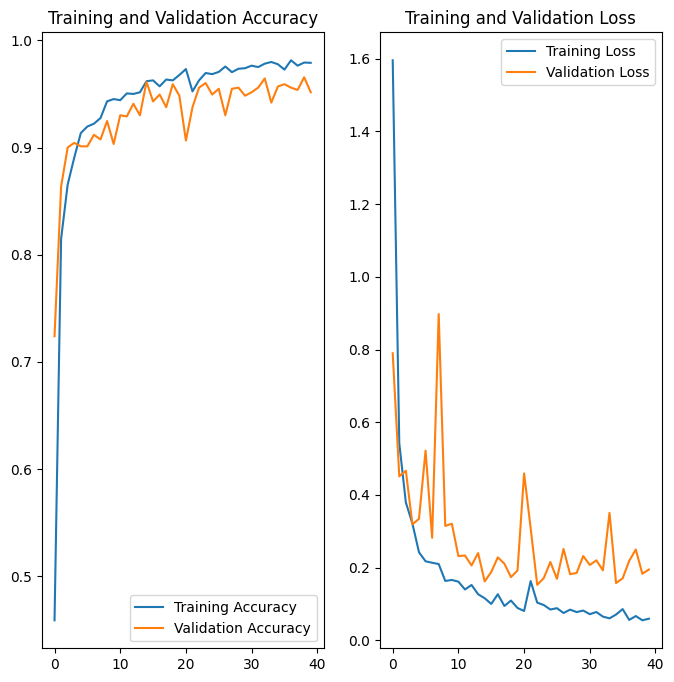

In [13]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss=his.history['loss']
val_loss=his.history['val_loss']
epochs_range = range(nb_epoch)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()